In [24]:
# Python libraries:
import os
import random
import sys
import numpy 
import hashlib
import matplotlib.pyplot as mplot
import librosa
import librosa.display
import IPython.display as ipython

sys.path.append('tools')
import utils
import sound_tools

In [25]:
#Init
random.seed(508)
numpy.random.seed(508)
mplot.style.use('seaborn')
#prop_cycle = mplot.rcParams['axes.prop_cycle']
#colors = prop_cycle.by_key()['color']
#blue, red = colors[1], colors[5]

# Paths
DATA           = os.path.join('data', 'temp')
RAW_DATA       = os.path.join('data', 'raw')
PROCESSED_DATA = os.path.join('data', 'processed')

In [26]:
if not os.path.exists(DATA):
    print('Data directory does not exist, creating them.')
    os.makedirs(DATA, exist_ok=True)
    os.makedirs(RAW_DATA, exist_ok=True)
    os.makedirs(PROCESSED_DATA, exist_ok=True)

In [27]:
first_file = os.path.join(DATA, 'fan', 'id_00', 'normal', '00000000.wav')
if os.path.exists(first_file):
    print('Sound files uploaded')
else:
    print('check te files presence')

Sound files uploaded


In [28]:
n_mels = 64
frames = 5
#n_fft = 2048
#hop_length = 512
power = 2.0

In [29]:
normal_signal_file = os.path.join(DATA, 'fan', 'id_00', 'normal', '00000100.wav')
abnormal_signal_file = os.path.join(DATA, 'fan', 'id_00', 'abnormal', '00000100.wav')
normal_signal, sr = sound_tools.load_sound_file(normal_signal_file)
abnormal_signal, sr = sound_tools.load_sound_file(abnormal_signal_file)
print(f'The signals have a {normal_signal.shape} shape. At {sr} Hz, these are {normal_signal.shape[0]/sr:.0f}s signals')

The signals have a (160000,) shape. At 16000 Hz, these are 10s signals


### Krótka transformata Fouriera

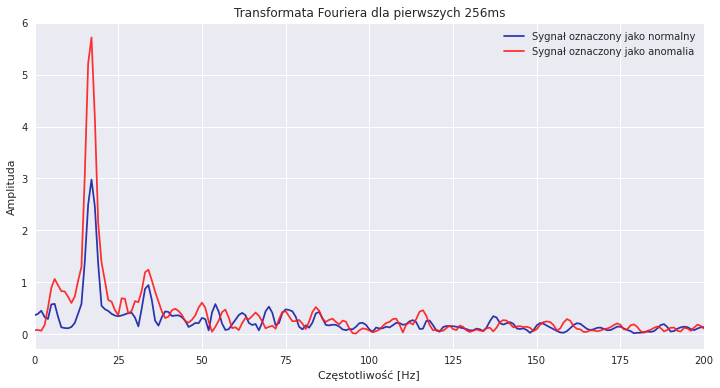

In [42]:
n_fft = 4096
hop_length = 512
blue = '#1520A6' #azure
red = '#ff1a1a'

D_normal = numpy.abs(librosa.stft(normal_signal[:n_fft], n_fft=n_fft, hop_length=n_fft + 1))
D_abnormal = numpy.abs(librosa.stft(abnormal_signal[:n_fft], n_fft=n_fft, hop_length=n_fft + 1))

fig = mplot.figure(figsize=(12, 6))
mplot.plot(D_normal, color=blue, alpha=0.9, label='Sygnał oznaczony jako normalny');
mplot.plot(D_abnormal, color=red, alpha=0.9, label='Sygnał oznaczony jako anomalia');
mplot.title('Transformata Fouriera dla pierwszych 256ms')
mplot.xlabel('Częstotliwość [Hz]')
mplot.ylabel('Amplituda')
mplot.legend()
mplot.xlim(0, 200);

###Spektrogramy

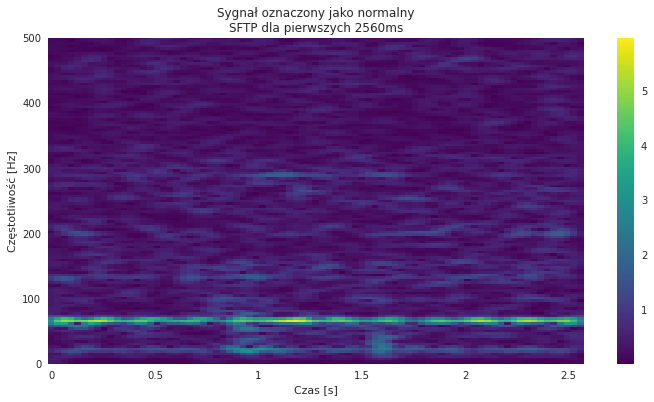

In [30]:
n_fft = 4096
D_normal = np.abs(librosa.stft(normal_signal[:10*n_fft], n_fft=n_fft, hop_length=hop_length))
dB_normal = sound_tools.get_magnitude_scale(normal_signal_file)

fig = mplot.figure(figsize=(12, 6))
librosa.display.specshow(D_normal, sr=sr, x_axis='time', y_axis='linear', cmap='viridis');
mplot.title('Sygnał oznaczony jako normalny\nSFTP dla pierwszych 2560ms')
mplot.ylim(0, 500)
mplot.xlabel('Czas [s]')
mplot.ylabel('Częstotliwość [Hz]')
mplot.colorbar()
mplot.show()

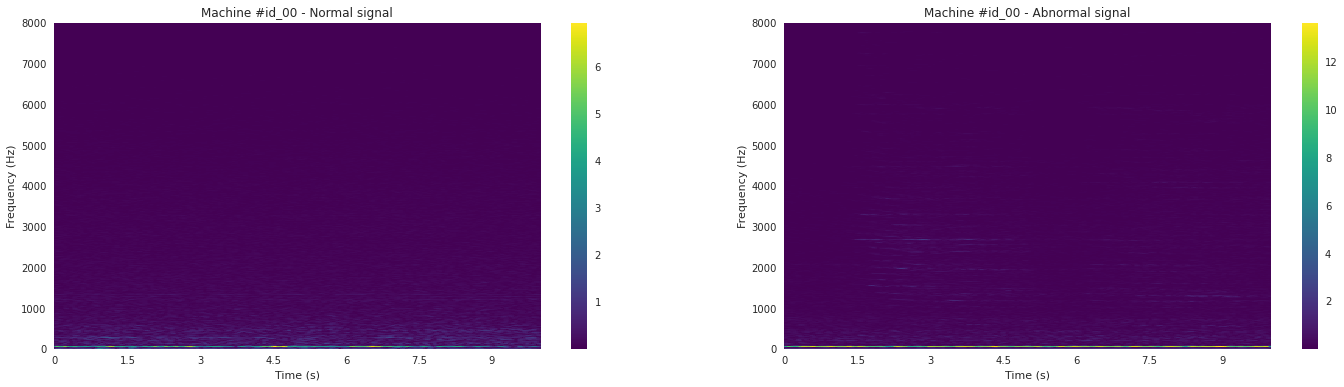

In [46]:
D_normal = numpy.abs(librosa.stft(normal_signal, n_fft=n_fft, hop_length=hop_length))
D_abnormal = numpy.abs(librosa.stft(abnormal_signal, n_fft=n_fft, hop_length=hop_length))

fig = mplot.figure(figsize=(24, 6))
mplot.subplot(1, 2, 1)
librosa.display.specshow(D_normal, sr=sr, x_axis='time', y_axis='linear', cmap='viridis');
mplot.title('Machine #id_00 - Normal signal')
mplot.xlabel('Time (s)')
mplot.ylabel('Frequency (Hz)')
mplot.colorbar();

mplot.subplot(1, 2, 2)
librosa.display.specshow(D_abnormal, sr=sr, x_axis='time', y_axis='linear', cmap='viridis');
mplot.title('Machine #id_00 - Abnormal signal')
mplot.xlabel('Time (s)')
mplot.ylabel('Frequency (Hz)')
mplot.colorbar();

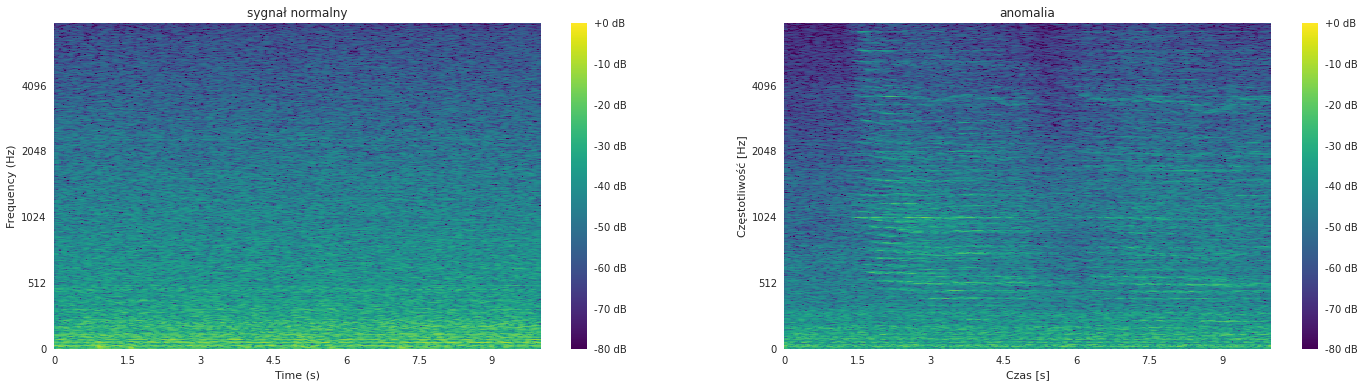

In [32]:
def load_sound_file(wav_name, mono=False, channel=0):
    multi_channel_data, sampling_rate = librosa.load(wav_name, sr=None, mono=mono)
    signal = np.array(multi_channel_data)[channel, :]
    return signal, sampling_rate

def get_magnitude_scale(file, n_fft=1024, hop_length=512):
    signal, sampling_rate = load_sound_file(file)
    stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)
    dB = librosa.amplitude_to_db(np.abs(stft), ref=np.max)
    return dB

dB_normal = get_magnitude_scale(normal_signal_file, n_fft=n_fft, hop_length=hop_length)
dB_abnormal = get_magnitude_scale(abnormal_signal_file, n_fft=n_fft, hop_length=hop_length)

fig = mplot.figure(figsize=(24, 6))

mplot.subplot(1, 2, 1)
librosa.display.specshow(dB_normal, sr=sr, x_axis='time', y_axis='mel', cmap='viridis')
mplot.title('sygnał normalny')
mplot.colorbar(format="%+2.f dB")
mplot.xlabel('Time (s)')
mplot.ylabel('Frequency (Hz)')

mplot.subplot(1, 2, 2)
librosa.display.specshow(dB_abnormal, sr=sr, x_axis='time', y_axis='mel', cmap='viridis')
mplot.title('anomalia')
mplot.ylabel('Częstotliwość [Hz]')
mplot.colorbar(format="%+2.f dB")
mplot.xlabel('Czas [s]')
mplot.ylabel('Częstotliwość [Hz]')

mplot.show()

###Mel 

/home/ec2-user/anaconda3/envs/mxnet_latest_p37/lib/python3.7/site-packages/ipykernel/__main__.py:1: FutureWarning: Pass y=[ 0.00271606  0.00195312  0.00250244 ... -0.00064087 -0.00042725
  0.00308228] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  if __name__ == '__main__':
/home/ec2-user/anaconda3/envs/mxnet_latest_p37/lib/python3.7/site-packages/ipykernel/__main__.py:3: FutureWarning: Pass y=[0.00723267 0.00756836 0.00732422 ... 0.00598145 0.00363159 0.00131226] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  app.launch_new_instance()


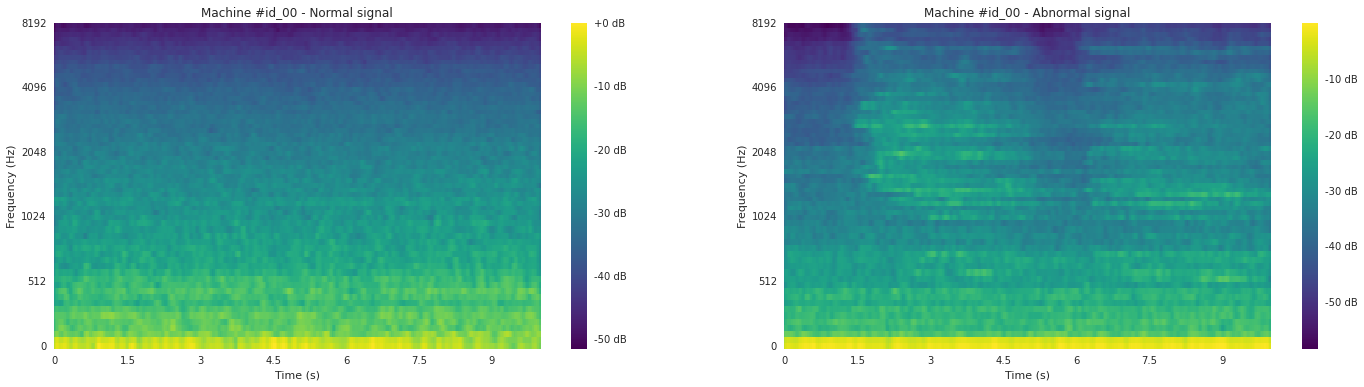

In [49]:
normal_mel = librosa.feature.melspectrogram(normal_signal, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
normal_S_DB = librosa.power_to_db(normal_mel, ref=np.max)
abnormal_mel = librosa.feature.melspectrogram(abnormal_signal, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
abnormal_S_DB = librosa.power_to_db(abnormal_mel, ref=np.max)

fig = mplot.figure(figsize=(24, 6))
mplot.subplot(1, 2, 1)
librosa.display.specshow(normal_S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel', cmap='viridis');
mplot.title('Machine #id_00 - Normal signal')
mplot.xlabel('Time (s)')
mplot.ylabel('Frequency (Hz)')
mplot.colorbar(format='%+2.0f dB');

mplot.subplot(1, 2, 2)
librosa.display.specshow(abnormal_S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel', cmap='viridis');
mplot.title('Machine #id_00 - Abnormal signal')
mplot.xlabel('Time (s)')
mplot.ylabel('Frequency (Hz)')
mplot.colorbar(format='%+2.0f dB');